<a href="https://colab.research.google.com/github/mukul2707/machine_learning/blob/master/fruit_with%20color_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('data.csv')
dataset.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [0]:
dataset = dataset.drop('fruit_label', axis=1)

In [5]:
dataset.head(10)

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
2,apple,granny_smith,176,7.4,7.2,0.60
3,mandarin,mandarin,86,6.2,4.7,0.80
4,mandarin,mandarin,84,6.0,4.6,0.79
5,mandarin,mandarin,80,5.8,4.3,0.77
6,mandarin,mandarin,80,5.9,4.3,0.81
7,mandarin,mandarin,76,5.8,4.0,0.81
8,apple,braeburn,178,7.1,7.8,0.92
9,apple,braeburn,172,7.4,7.0,0.89


In [6]:
dataset.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_name     59 non-null     object 
 1   fruit_subtype  59 non-null     object 
 2   mass           59 non-null     int64  
 3   width          59 non-null     float64
 4   height         59 non-null     float64
 5   color_score    59 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [29]:
dataset.shape

(59, 6)

In [30]:
print(dataset['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [9]:
dataset['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

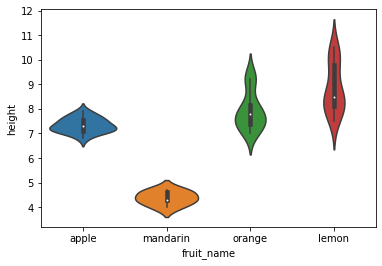

In [11]:
sns.violinplot(x='fruit_name',y='height',data=dataset)
plt.show()

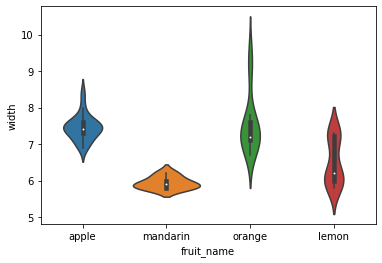

In [13]:
sns.violinplot(x='fruit_name',y='width',data=dataset)
plt.show()

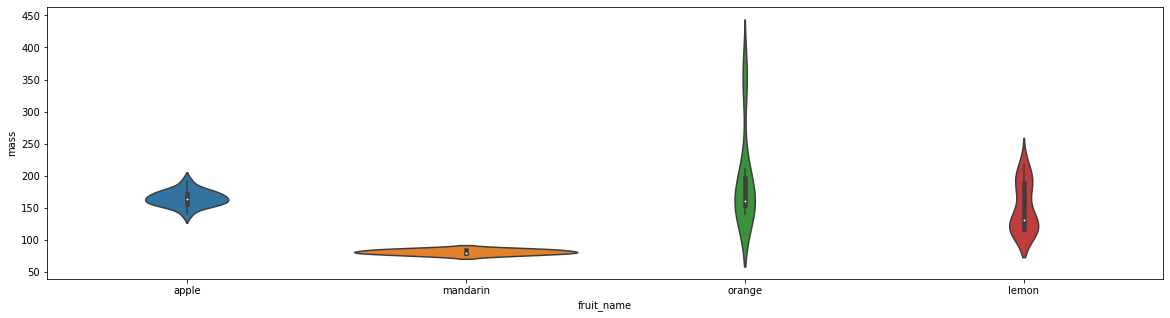

In [28]:
plt.figure(figsize=(20,5))
sns.violinplot(x='fruit_name',y='mass',data=dataset)
plt.show()

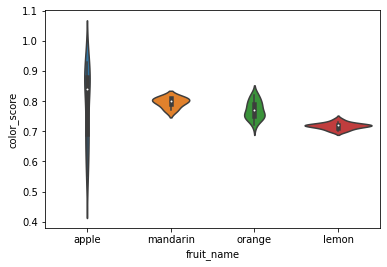

In [15]:
sns.violinplot(x='fruit_name',y='color_score',data=dataset)
plt.show()

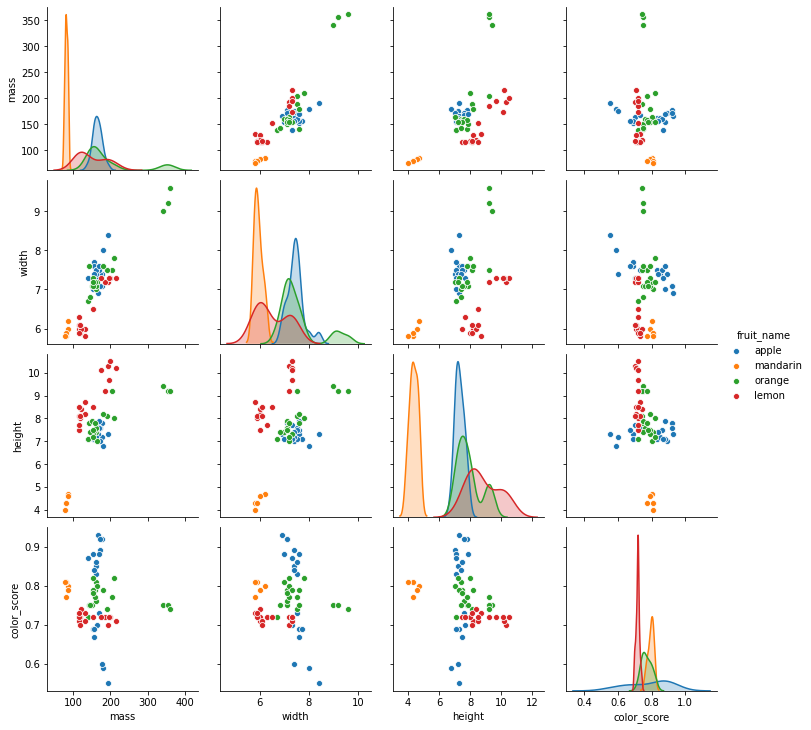

In [19]:
sns.pairplot(data = dataset,hue='fruit_name')

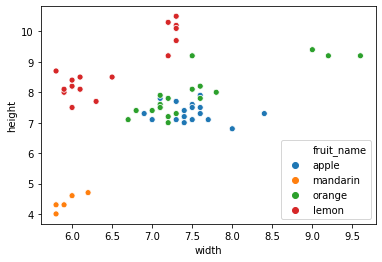

In [23]:
sns.scatterplot(x='width',y='height',hue='fruit_name',data=dataset)
plt.show()

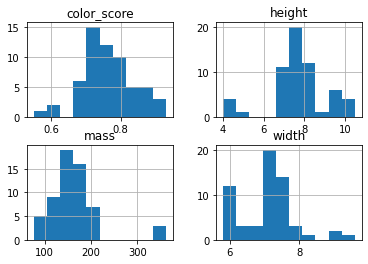

In [26]:
dataset.hist()
plt.show()

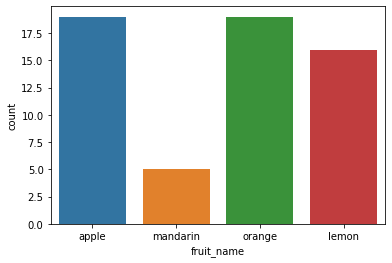

In [32]:
sns.countplot(dataset['fruit_name'],label ='count')
plt.show()

#KNN

In [33]:
dataset.columns

Index(['fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [0]:
X = dataset[['mass', 'width', 'height',
       'color_score']]

In [0]:
y = dataset['fruit_name']

In [37]:
print(X.shape)
print(y.shape)

(59, 4)
(59,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(35, 4)
(35,)
(24, 4)
(24,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=4)

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
knn_pred = knn.predict(X_test)

In [45]:
print(knn_pred)

['orange' 'apple' 'lemon' 'lemon' 'apple' 'apple' 'lemon' 'lemon' 'apple'
 'lemon' 'mandarin' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'mandarin' 'apple' 'apple' 'lemon' 'apple' 'apple' 'lemon']


In [0]:
from sklearn import metrics

In [47]:
print(metrics.accuracy_score(y_test,knn_pred))

0.4583333333333333


In [0]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)
knn1_pred = knn1.predict(X_test)


In [49]:
print(knn1_pred)

['orange' 'apple' 'lemon' 'apple' 'apple' 'apple' 'apple' 'lemon' 'apple'
 'apple' 'mandarin' 'apple' 'apple' 'apple' 'lemon' 'apple' 'apple'
 'mandarin' 'apple' 'apple' 'lemon' 'apple' 'apple' 'lemon']


In [50]:
print(metrics.accuracy_score(y_test,knn1_pred))

0.5


In [52]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_train,y_train)
knn2_pred = knn2.predict(X_test)
print(knn2_pred)


['orange' 'apple' 'lemon' 'apple' 'apple' 'apple' 'apple' 'lemon' 'apple'
 'apple' 'lemon' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'lemon'
 'apple' 'apple' 'lemon' 'apple' 'apple' 'lemon']


In [54]:
print(metrics.accuracy_score(y_test,knn2_pred))

0.4166666666666667


In [55]:
print(knn.score(X_test,y_test))
print(knn1.score(X_test,y_test))
print(knn2.score(X_test,y_test))

0.4583333333333333
0.5
0.4166666666666667


#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=32)

In [57]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [0]:
dt_pred = dt.predict(X_test)

In [61]:
print(metrics.accuracy_score(y_test,dt_pred))

0.875


In [62]:
print(dt_pred)

['orange' 'orange' 'lemon' 'orange' 'apple' 'apple' 'lemon' 'lemon'
 'orange' 'orange' 'mandarin' 'apple' 'orange' 'orange' 'orange' 'orange'
 'lemon' 'mandarin' 'apple' 'orange' 'lemon' 'orange' 'apple' 'lemon']


#Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [66]:
print(rf_pred)

['orange' 'orange' 'lemon' 'lemon' 'apple' 'apple' 'orange' 'lemon'
 'apple' 'apple' 'mandarin' 'apple' 'orange' 'orange' 'lemon' 'apple'
 'lemon' 'mandarin' 'apple' 'apple' 'lemon' 'orange' 'apple' 'lemon']


In [67]:
print(metrics.accuracy_score(y_test,rf_pred))

0.75
